In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [3]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [4]:
res.x

array([1., 1., 1., 1., 1.])

In [5]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [6]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In [7]:
print(res.x)

[1.00000004 1.0000001  1.00000021 1.00000044 1.00000092]


In [8]:
res = minimize(rosen, x0, method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 180
         Gradient evaluations: 30


In [9]:
print(res.x)

[0.99999925 0.99999852 0.99999706 0.99999416 0.99998833]


In [10]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [11]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 24


In [12]:
print(res.x)

[1.         1.         1.         0.99999999 0.99999999]


In [13]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 161
         Hessian evaluations: 0


In [14]:
print(res.x)

[1. 1. 1. 1. 1.]


In [15]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [16]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 66


In [17]:
print(res.x)

[1.         1.         1.         0.99999999 0.99999999]


In [18]:
res = minimize(rosen, x0, method='trust-ncg',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 20
         Hessian evaluations: 19


In [19]:
print(res.x)

[1. 1. 1. 1. 1.]


In [20]:
res = minimize(rosen, x0, method='trust-ncg',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 20
         Hessian evaluations: 74


In [21]:
print(res.x)

[1. 1. 1. 1. 1.]


In [22]:
from scipy.optimize import Bounds
bounds = Bounds([0, -0.5], [1.0, 2.0])

In [23]:
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

In [24]:
def cons_f(x):
    return [x[0]**2 + x[1], x[0]**2 - x[1]]
def cons_J(x):
    return [[2*x[0], 1], [2*x[0], -1]]
def cons_H(x, v):
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])
from scipy.optimize import NonlinearConstraint
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

In [25]:
from scipy.sparse import csc_matrix
def cons_H_sparse(x, v):
    return v[0]*csc_matrix([[2, 0], [0, 0]]) + v[1]*csc_matrix([[2, 0], [0, 0]])
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1,
                                           jac=cons_J, hess=cons_H_sparse)

In [26]:
from scipy.sparse.linalg import LinearOperator
def cons_H_linear_operator(x, v):
    def matvec(p):
        return np.array([p[0]*2*(v[0]+v[1]), 0])
    return LinearOperator((2, 2), matvec=matvec)
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1,
                                          jac=cons_J, hess=cons_H_linear_operator)

In [27]:
from scipy.optimize import BFGS
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=BFGS())

In [28]:
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess='2-point')

In [29]:
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='2-point', hess=BFGS())

In [30]:
#nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='2-point', hess='2-point')

In [31]:
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.033 s.


In [32]:
print(res.x)

[0.41494531 0.17010937]


In [33]:
def rosen_hess_linop(x):
    def matvec(p):
        return rosen_hess_p(x, p)
    return LinearOperator((2, 2), matvec=matvec)
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess_linop,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.021 s.


In [34]:
print(res.x)

[0.41494531 0.17010937]


In [35]:
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hessp=rosen_hess_p,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.024 s.


In [36]:
print(res.x)

[0.41494531 0.17010937]


In [37]:
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}

In [38]:
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='SLSQP', jac=rosen_der,
               constraints=[eq_cons, ineq_cons], options={'ftol': 1e-9, 'disp': True},
               bounds=bounds)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34271757499419825
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4


In [39]:
print(res.x)

[0.41494475 0.1701105 ]


In [41]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))
bounds = [(-512, 512), (-512, 512)]

Text(0.5, 0, 'eggholder(x, y)')

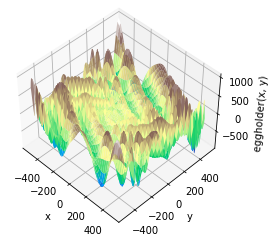

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')


In [46]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])

In [47]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -959.6406627208277
 message: ['Maximum number of iteration reached']
    nfev: 4109
    nhev: 0
     nit: 1000
    njev: 36
  status: 0
 success: True
       x: array([512.        , 404.23180059])

In [48]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)

In [49]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')

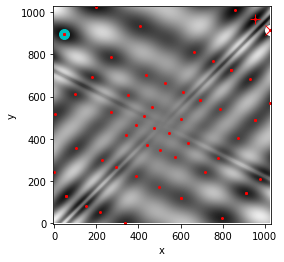

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')

plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()

In [51]:
for result in results:
    print(result, results[result])

shgo      fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])
DA      fun: -959.6406627208277
 message: ['Maximum number of iteration reached']
    nfev: 4109
    nhev: 0
     nit: 1000
    njev: 36
  status: 0
 success: True
       x: array([512.        , 404.23180059])
DE      fun: -894.5789003904448
     jac: array([1.13686748e-05, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 558
     nit: 17
 success: True
       x: array([-465.69411951,  385.71670298])
shgo_sobol      fun: -959.6406627208441
    funl: array([-959.64066272, -935.33795156, -894.57890039, -894.57890039,
       -888.94912527, -821.19646107, -786.52599408, -786.52599408,
       -738.03782981, -718.16745962, -716.67150034, -716.67150034,
       -716.16462286, -704.8

In [52]:
from scipy.optimize import least_squares

In [53]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

In [54]:
def fun(x, u, y):
    return model(x, u) - y

In [55]:
def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

In [56]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.


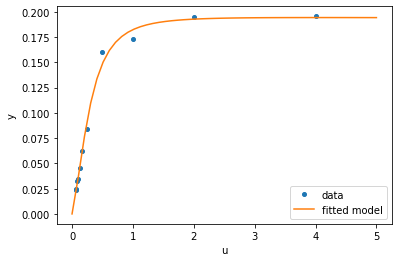

In [57]:
import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

In [58]:
from scipy.optimize import minimize_scalar
f = lambda x: (x - 2) * (x + 1)**2
res = minimize_scalar(f, method='brent')
print(res.x)

1.0


In [59]:
from scipy.special import j1
res = minimize_scalar(j1, bounds=(4, 7), method='bounded')
res.x

5.3314418424098315

In [60]:
import numpy as np
from scipy.optimize import root
def func(x):
    return x + 2 * np.cos(x)
sol = root(func, 0.3)
sol.x

array([-1.02986653])

In [61]:
sol.fun

array([-6.66133815e-16])

In [62]:
def func2(x):
    f = [x[0] * np.cos(x[1]) - 4,
         x[1]*x[0] - x[1] - 5]
    df = np.array([[np.cos(x[1]), -x[0] * np.sin(x[1])],
                   [x[1], x[0] - 1]])
    return f, df
sol = root(func2, [1, 1], jac=True, method='lm')
sol.x

array([6.50409711, 0.90841421])

In [64]:
import numpy as np
from scipy.optimize import linprog
c = np.array([-29.0, -45.0, 0.0, 0.0])
A_ub = np.array([[1.0, -1.0, -3.0, 0.0],
                [-2.0, 3.0, 7.0, -3.0]])
b_ub = np.array([5.0, -10.0])
A_eq = np.array([[2.0, 8.0, 1.0, 0.0],
                [4.0, 4.0, 0.0, 1.0]])
b_eq = np.array([60.0, 60.0])
x0_bounds = (0, None)
x1_bounds = (0, 6.0)
x2_bounds = (-np.inf, 0.5)  # +/- np.inf can be used instead of None
x3_bounds = (-3.0, None)
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds]
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
print(result)

     con: array([9.80189441e-09, 1.04818270e-08])
     fun: -505.97435889001497
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 6.53415988e-10, -2.27129604e-09])
  status: 0
 success: True
       x: array([ 9.41025641,  5.17948718, -0.25641026,  1.64102564])


In [65]:
x = np.array(result.x)
print(c @ x)

-505.97435889001497


In [66]:
print(b_ub - (A_ub @ x).flatten())
print(b_eq - (A_eq @ x).flatten())
print([0 <= result.x[0], 0 <= result.x[1] <= 6.0, result.x[2] <= 0.5, -3.0 <= result.x[3]])

[ 6.53415988e-10 -2.27129604e-09]
[9.80189441e-09 1.04818270e-08]
[True, True, True, True]


In [76]:
import numpy as np
cost = np.array([[43.5,47.1,48.4, 38.2, 42.5],
                [45.5,42.1,49.6,36.8,40.2],
                [43.4,39.1,42.1,43.2,34.5],
                [46.5,44.1,44.5,41.2,40.1],
                [46.3,47.8,50.4,37.2,48.4]])

In [77]:
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost, maximize=True)

In [82]:
row_ind, col_ind

(array([0, 1, 2, 3, 4]), array([1, 2, 3, 0, 4], dtype=int64))

In [83]:
workers = np.array(["A", "B", "C", "D", "E"])[row_ind]
jobs = np.array(["1", "2", "3", "4", "5"])[col_ind]
dict(zip(workers, jobs))

{'A': '2', 'B': '3', 'C': '4', 'D': '1', 'E': '5'}

In [80]:
cost[row_ind, col_ind].sum()

234.8

In [81]:
np.min(cost, axis=0).sum()

195.89999999999998